# Entropy of IR fields leading up to MCS initiation
For evolutionary theory paper 

In [173]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob 

In [175]:
glob('/Users/bmapes/Downloads/AMZ_23Z*.nc')

['/Users/bmapes/Downloads/AMZ_23Z_2020-11-13_12hleadup.nc',
 '/Users/bmapes/Downloads/AMZ_23Z_2020-05-29_12hleadup.nc',
 '/Users/bmapes/Downloads/AMZ_23Z_2020-05-18_12hleadup.nc',
 '/Users/bmapes/Downloads/AMZ_23Z_2020-10-10_12hleadup.nc']

In [187]:
# Requires dask for some reason, must install in environment

mfds = xr.open_mfdataset( glob('/Users/bmapes/Downloads/AMZ_23Z*.nc'), combine='nested', concat_dim='case') 
mfds

<xarray.Dataset>
Dimensions:    (lat: 753, lon: 696, time1: 20, case: 4)
Coordinates:
  * lat        (lat) float32 -36.05 -35.98 -35.91 -35.84 ... 16.45 16.52 16.59
  * lon        (lon) float32 -75.98 -75.91 -75.84 -75.77 ... -27.47 -27.4 -27.33
  * time1      (time1) datetime64[ns] 2020-05-18T12:00:00 ... 2020-11-14
    time1_run  (time1) datetime64[ns] dask.array<chunksize=(20,), meta=np.ndarray>
Dimensions without coordinates: case
Data variables:
    irwin_cdr  (case, time1, lat, lon) float32 dask.array<chunksize=(1, 20, 753, 696), meta=np.ndarray>

In [3]:
ds = xr.open_dataset('/Users/bmapes/Downloads/AMZ_23Z_2020-05-18_12hleadup.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 571, lon: 572, time1: 5)
Coordinates:
  * lat        (lat) float32 -23.31 -23.24 -23.17 -23.1 ... 16.45 16.52 16.59
  * lon        (lon) float32 -73.39 -73.32 -73.25 ... -33.56 -33.49 -33.42
  * time1      (time1) datetime64[ns] 2020-05-18T12:00:00 ... 2020-05-19
    time1_run  (time1) datetime64[ns] ...
Data variables:
    irwin_cdr  (time1, lat, lon) float32 ...

In [16]:
NT,NLAT,NLON = ds.irwin_cdr.shape
# Extract central 512x512

#numpy 
#IR512 = ds.irwin_cdr.values[:,NLAT//2-256:NLAT//2+256,NLON//2-256:NLON//2+256]
#IR512.shape

IR = ds.irwin_cdr.isel(lat = slice(NLAT//2-256,NLAT//2+256), lon = slice(NLON//2-256,NLON//2+256)) 
IR

<xarray.DataArray 'irwin_cdr' (time1: 5, lat: 512, lon: 512)>
array([[[282.63   , 283.02   , ..., 295.27   , 295.27   ],
        [283.68   , 283.16   , ..., 294.68   , 295.27   ],
        ...,
        [272.37   , 268.72   , ..., 289.54   , 288.51   ],
        [276.16   , 271.32   , ..., 291.61   , 291.08   ]],

       [[283.82   , 282.63   , ..., 295.27   , 295.27   ],
        [285.38   , 283.29   , ..., 295.27   , 295.27   ],
        ...,
        [285.25   , 287.04   , ..., 276.88   , 291.61   ],
        [293.56   , 287.8    , ..., 278.05   , 286.41   ]],

       ...,

       [[284.99   , 284.73   , ..., 295.27   , 295.27   ],
        [285.25   , 284.6    , ..., 295.27   , 295.27   ],
        ...,
        [284.73   , 288.05   , ..., 290.04   , 292.13998],
        [289.8    , 290.54   , ..., 292.13998, 292.13998]],

       [[283.41998, 282.76   , ..., 294.16998, 294.16998],
        [282.76   , 283.41998, ..., 293.06   , 294.68   ],
        ...,
        [257.91   , 261.57   , ..., 288.51   , 291.61   ],
        [269.63998, 269.18   , ..., 291.09   , 291.61   ]]], dtype=float32)
Coordinates:
  * lat        (lat) float32 -21.28 -21.21 -21.14 -21.07 ... 14.35 14.42 14.49
  * lon        (lon) float32 -71.29 -71.22 -71.15 ... -35.66 -35.59 -35.52
  * time1      (time1) datetime64[ns] 2020-05-18T12:00:00 ... 2020-05-19
    time1_run  (time1) datetime64[ns] ...
Attributes:
    units:              Kelvin
    long_name:          NOAA FCDR of Brightness Temperature near 11 microns (...
    standard_name:      toa_brightness_temperature
    comment:            Nadir-most observations
    Note_A:             Calibration correction of Kanpp (2007) not applied
    Note_B:             The IRWIN_CDR data have been View Zenith corrected us...
    intergeo_cal_flag:  0
    _ChunkSizes:        [   1 2000 5143]

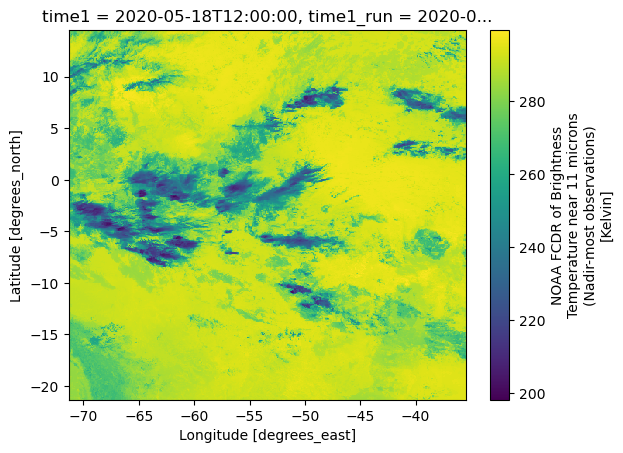

In [23]:
sq = IR.isel(time1=0)
sq.plot()

In [75]:
coarsens = 2**np.linspace(1,8,8)
coarsens

array([  2.,   4.,   8.,  16.,  32.,  64., 128., 256.])

In [45]:
sq.coarsen({'lon':coarsens}) #.mean(dim='lon')

DataArrayCoarsen [windows->{'lon': array([  2.,   4.,   8.,  16.,  32.,  64., 128., 256.])},side->left]

In [56]:
quint1 = np.sort( np.ravel( sq.values) )[sq.size//5]     # 1/5
quint5 = np.sort( np.ravel( sq.values) )[4*sq.size//5]   # 4/5 
quint1, quint5

(276.3, 293.76)

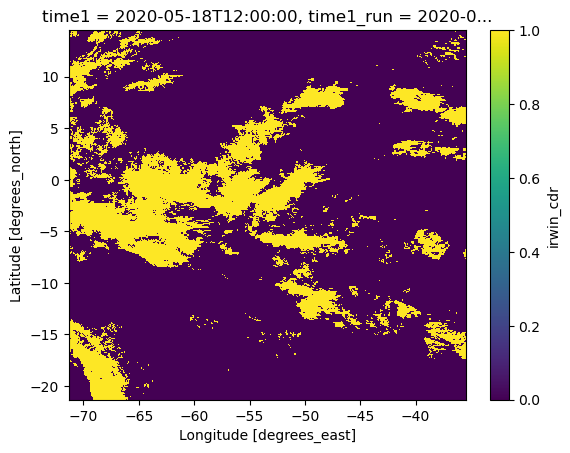

In [58]:
(sq < quint1).plot()

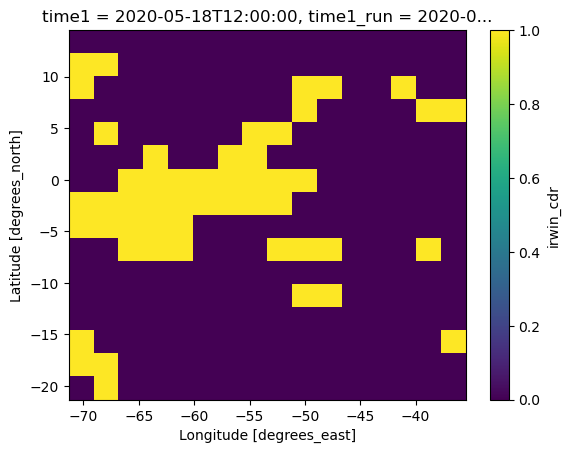

In [81]:
#sq.coarsen(lat=16, lon=16).mean()

sq16 = sq.coarsen(lat=int(coarsens[4]), lon=int(coarsens[4])).mean()

quint1 = np.sort( np.ravel( sq.values) )[sq.size//5]     # 1/5 of area 
(sq16 < quint1).plot()

# Average these arrays 
## which have 20% coverage by construction (quintile exceedance) 
### Assess non-uniformity of resulting as entropy difference from max

In [161]:
# Bin the exceedance array into a histogram for entropy computation 

coldfreq = (sq16 < quint1) # later will want to sum over cases 

hist = coldfreq.to_dataset().groupby_bins('irwin_cdr', bins=np.linspace(-0.005,1,120) ).mean()
hist.irwin_cdr

<xarray.DataArray 'irwin_cdr' (irwin_cdr_bins: 119)>
array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan,  1.])
Coordinates:
  * irwin_cdr_bins  (irwin_cdr_bins) object (-0.005, 0.00345] ... (0.992, 1.0]
    time1           datetime64[ns] 2020-05-18T12:00:00
    time1_run       datetime64[ns] 2020-05-18T12:00:00

In [162]:
# in comes a histogram, out comes an entropy 
def entropy(histogram): 
    histo = histogram.fillna(1E-99) + 1E-99 # replace both 0 and nan with 1 or 2 e-99
    p = histo/np.sum(histo) 
    H = -np.sum( p* np.log2(p) ) 
    return H.values

In [163]:
histo = hist.irwin_cdr.fillna(1E-99) + 1e-99
#histo
p = histo/np.sum(histo) 
#p
#p*np.log2(p)
np.sum( p* np.log2(p) ).values

array(-7.70506571e-95)

In [168]:
entropy(hist.irwin_cdr)

array(7.70506571e-95)

In [171]:
entropy(hist.irwin_cdr + 100) # nearly uniform distribution, one value is 101 

array(0.99998215)